# TP Abalone
Étudiant : Aubert Nicolas, ISC3il-b

Date : 28.08.2023

Enseignant : Hatem Ghorbel

## 1. Ploter un histogramme de l’âge.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

<AxesSubplot: ylabel='Frequency'>

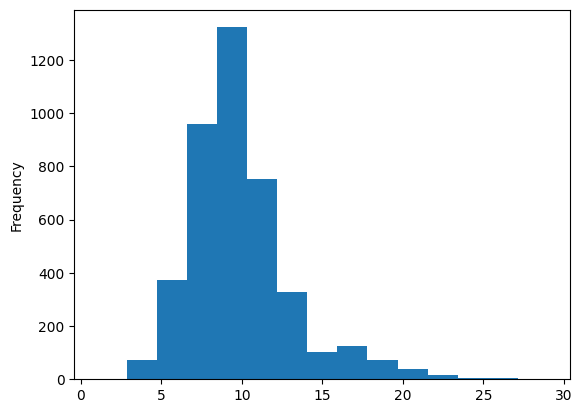

In [3]:
# Load data from the abalone.data file, with pandas
data = pd.read_csv('abalone.data', header=None)

# Remove the first column
data = data.drop(0, axis=1)

# Add column names : Length	Diam	Height	Whole	Shucked	Viscera	Shell	Rings
data.columns = ['Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings']

# Plot, with pandas, the distribution of the number of rings
data['Rings'].plot.hist(bins=15)

## 2. Quelles sont les variables que vous proposez dans les X du modèle avant d’appliquer un algorithme de K-NN ?

In [4]:
X = data.values[:, :7].astype(np.float64)
y = data.Rings.values

## 3. Nous disposons de 4177 mesures et nous avons construit un dataset de 80% d’entrainement et 20% de test. Appliquer le K-NN en variant les paramètres suivants : k et weight.

In [6]:
# Use the method 'train_test_split' to use 80 percent of the dataset for trainining and 20 for tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

accuracies = {}

for k in range(1, 20):
    # Create a k-NN classifier with k neighbors
    clf = neighbors.KNeighborsRegressor(k)
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict the labels of the test data
    y_pred = clf.predict(X_test)
    
    # Compute the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)
    print("k=%d, accuracy=%.2f%%" % (k, mse))
    
    # Store the accuracy in the dictionary
    accuracies[k] = mse

k=1, accuracy=8.54%
k=2, accuracy=6.29%
k=3, accuracy=5.79%
k=4, accuracy=5.31%
k=5, accuracy=5.27%
k=6, accuracy=5.16%
k=7, accuracy=5.11%
k=8, accuracy=5.05%
k=9, accuracy=5.08%
k=10, accuracy=5.03%
k=11, accuracy=4.97%
k=12, accuracy=4.92%
k=13, accuracy=4.90%
k=14, accuracy=4.90%
k=15, accuracy=4.93%
k=16, accuracy=4.92%
k=17, accuracy=4.90%
k=18, accuracy=4.89%
k=19, accuracy=4.91%



## 4. Calculer le RMSE (indication : autour de 2.37)
Interpréter ce résultat ?

In [8]:
# Compute RMSE for each value of k
for k in range(1, 20):
    # Create a k-NN classifier with k neighbors
    clf = neighbors.KNeighborsRegressor(k)
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict the labels of the test data
    y_pred = clf.predict(X_test)
    
    # Compute the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("k=%d, accuracy=%.2f%%" % (k, rmse))
    
    # Store the accuracy in the dictionary
    accuracies[k] = rmse

k=1, accuracy=2.92%
k=2, accuracy=2.51%
k=3, accuracy=2.41%
k=4, accuracy=2.31%
k=5, accuracy=2.30%
k=6, accuracy=2.27%
k=7, accuracy=2.26%
k=8, accuracy=2.25%
k=9, accuracy=2.25%
k=10, accuracy=2.24%
k=11, accuracy=2.23%
k=12, accuracy=2.22%
k=13, accuracy=2.21%
k=14, accuracy=2.21%
k=15, accuracy=2.22%
k=16, accuracy=2.22%
k=17, accuracy=2.21%
k=18, accuracy=2.21%
k=19, accuracy=2.22%



## 5. Comment peut-on améliorer la régression ?

In [10]:
# Use a regressor with the best value of k
clf = neighbors.KNeighborsRegressor(3)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Compute the RMSE of the predictions
rmse = np.sqrt(mse)

# Print the results
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 5.79
RMSE: 2.41


## 6. Peut-on appliquer la technique de bagging pour encore améliorer la performance du modèle ? comment ?

In [9]:
# Use a random forest regressor
clf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("MSE = %.2f" % mse)
print("RMSE = %.2f" % rmse)

MSE = 5.02
RMSE = 2.24
